## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.__version__

'0.14.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

I will load the `blobs.tif` image file from disk and display it using the appropriate Python libraries.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
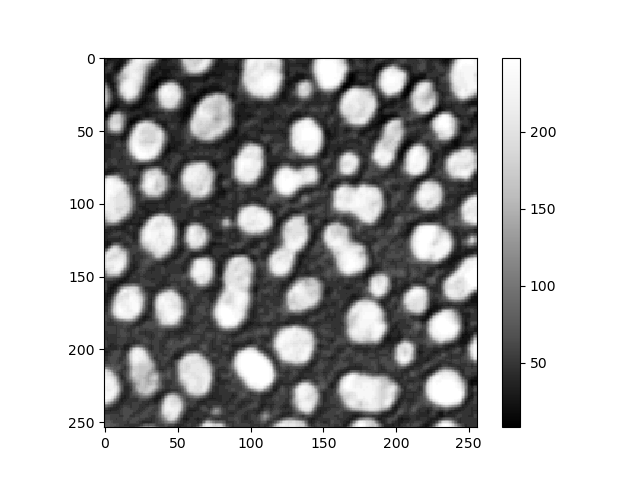
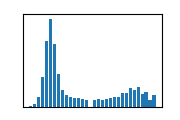

In [6]:
from skimage.io import imread
import stackview

# Load the image
filename = 'blobs.tif'
image = imread(filename)

# Display the image
stackview.insight(image)

In [3]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

I will load the `blobs.tif` grayscale image, segment nuclei-like objects using Otsu's thresholding and connected component labeling, measure the area of the segmented labels, and print the area on top of the labels.



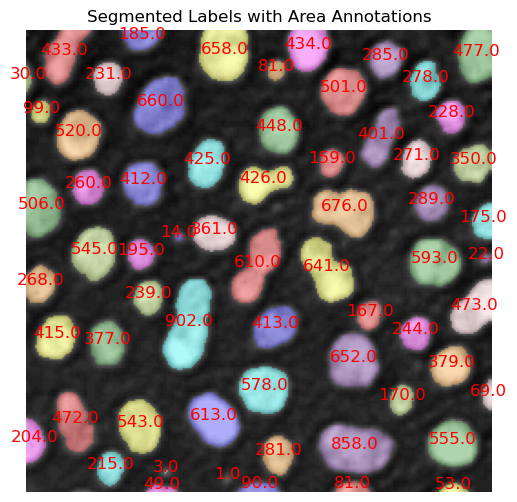

In [7]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Load the image
filename = 'blobs.tif'
image = imread(filename)

# Apply Otsu's thresholding
thresh = threshold_otsu(image)
binary = image > thresh

# Perform connected component labeling
labels = label(binary)

# Measure properties of the labeled regions
props = regionprops(labels)

# Create an RGB image to overlay text
overlay = label2rgb(labels, image=image, bg_label=0)

# Plot the image and annotate with areas
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(overlay)
for prop in props:
    y, x = prop.centroid
    ax.text(x, y, f'{prop.area}', color='red', fontsize=12, ha='center')

ax.set_title('Segmented Labels with Area Annotations')
ax.axis('off')
plt.show()

In [4]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

I will take the segmented label image, expand the labels by 4 pixels, and then display the resulting label image.



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
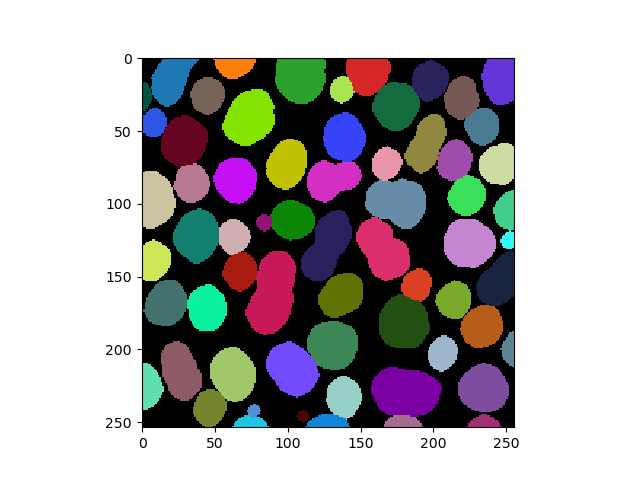

In [8]:
from skimage.segmentation import expand_labels
import stackview

# Expand the labels by 4 pixels
expanded_labels = expand_labels(labels, distance=4)

# Display the resulting expanded label image
stackview.insight(expanded_labels)